# Intern Test (round #1)

## A. Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv('energydata_complete.csv')
data.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [2]:
data.isna().sum()[-10:]

T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [3]:
#переведите колонку date в тип datetime

data['date'] = pd.to_datetime(data.date)


In [4]:
#из date извлечь weekofyear в колонку week

data['week'] = list(map(lambda x: x.weekofyear, data['date']))

In [5]:
#должны получиться недели со 2 по 21

sorted(list(data['week'].value_counts().keys()))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#оставить недели 3...20

data = data[data['week'] >=3][data['week'] <=20]

In [8]:
#сделать date индексом
data.set_index('date', inplace = True)

In [9]:
data.head(3)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,week
date,,,,,,,,,,,,,,,,,,,,,
2016-01-18 00:00:00,60,10,21.823333,39.900000,20.230000,40.0000,20.323333,39.79,21.166667,39.863333,...,38.400000,-2.800000,763.700000,86.0,2.0,25.0,-4.900000,2.995012,2.995012,3
2016-01-18 00:10:00,50,10,21.790000,39.933333,20.166667,40.0900,20.390000,39.79,21.100000,39.826667,...,38.466667,-2.883333,763.583333,86.0,2.0,25.5,-4.983333,7.407794,7.407794,3
2016-01-18 00:20:00,40,10,21.730000,40.000000,20.075000,40.0675,20.323333,39.79,21.100000,39.900000,...,38.400000,-2.966667,763.466667,86.0,2.0,26.0,-5.066667,3.649394,3.649394,3


In [10]:
#все остальные колонки воспринимаем как float

data[data.columns] = data[data.columns].astype(float)
set(data.dtypes)

{dtype('float64')}

In [11]:
#- колонка `Appliances` – целевая переменная `y`
#всё остальное – X, т.е. признаки

y = data['Appliances']
X = data.drop(['Appliances'], axis = 1)

In [12]:
data[data['week'] == 20].index[0]

Timestamp('2016-05-16 00:00:00')

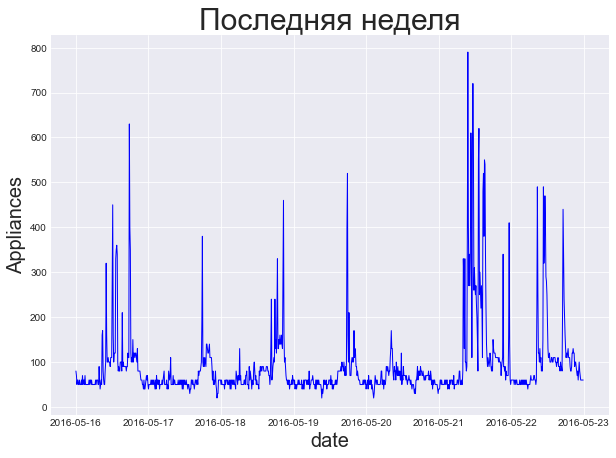

In [13]:
#(убедитесь, что датасет отсортирован по дате)
data = data.sort_index(ascending=True)

#Визуализируйте последнюю неделю
plt.style.use('seaborn-darkgrid')

plt.figure(figsize=(10, 7))
plt.plot(data[data['week'] == 20].index, data[data['week'] == 20]['Appliances'], '-', linewidth = 1, color = 'blue')
plt.xlabel('date', size = 20)
plt.ylabel('Appliances', size = 20)
plt.title('Последняя неделя', size = 30)
plt.show()

# B. Validation

In [14]:
#Разобъём датасет на 2 части: 

#данные за недели 19-20 – тестовая выборка
#недели 3-18 – обучающая выборка

test_data = data[data['week'] <= 20][data['week'] >= 19]
train_data = data[data['week'] <= 18]

train_x, train_y = train_data.drop(['Appliances'], axis = 1), train_data['Appliances']
test_x, test_y = test_data.drop(['Appliances'], axis = 1), test_data['Appliances']


#Как называется данный вид валидации?
#Ответ: Разделение данных (Train / Test Split)

### Альтернативное задание

In [15]:
# Вместо разбиения на тренировочную и валидационную использовать time-series кросс-валидацию на 5 фолдов


def timeseriesCVscore(data, model, metric):
    
    # вектор ошибок
    errors = []

    for w in (11,20):
        
        test_data = data[data['week'] <= w+1][data['week'] >= w]
        train_data = data[data['week'] < w]
        
        train_x, train_y = train_data.drop(['Appliances'], axis = 1), train_data['Appliances']
        test_x, test_y = test_data.drop(['Appliances'], axis = 1), test_data['Appliances']

        model.fit(train_x, train_y)

        preds = model.predict(test_x)
        error = metric(preds, test_y)
        errors.append(error)

    # Возвращаем среднее по вектору ошибок 
    return np.mean(np.array(errors))

## C. Feature Extraction

In [16]:
import xgboost as xgb
from xgboost import XGBRegressor

In [17]:
model = XGBRegressor(max_depth = 4, n_estimators = 200, n_jobs = -1)

In [18]:
model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

##### В чём отличие между leaf-wise tree и depth-wise tree?

 - depth-wise tree строится по такому принципу: у каждого noda-а есть дочерние node-ы
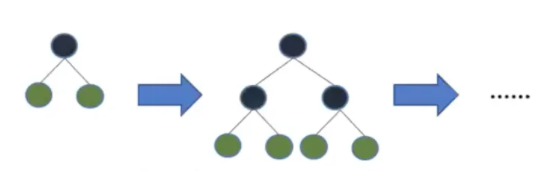

- В leaf-wise tree разбиение делается только в том node, которое максимально уменьшит loss
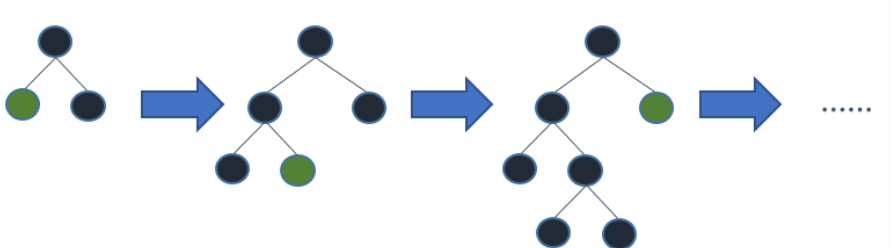

leaf-wise tree зачастую дает меньший loss, чем depth-wise tree, но при маленьком объеме данных leaf-wise tree склонно к переобучению и в данном случае depth-wise подход выступает в роли регуляризации.

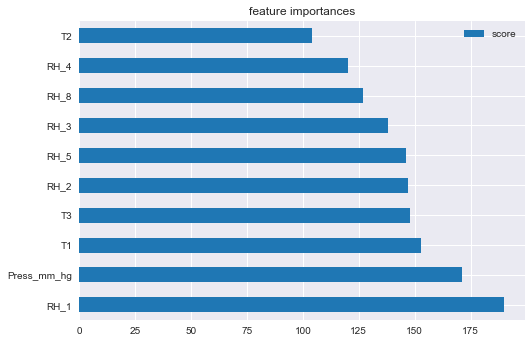

In [19]:
#Визуализировать feature importances (оставить топ-10)

plt.style.use('seaborn-notebook')

feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

dat = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)[:10]
dat.plot(kind='barh', title = 'feature importances');

##### Как считается feature importance в выбранном вами бустинге?

Важность признака определяется тем как часто в узлах деревьев разбиение производится по данному признаку. Чем чаже данный признак встречается в узлах, тем больше его важность. 

In [20]:
#Если для валидации выбрана кросс-валидация, мы имеем 5 моделей.
#У каждой модели своя важность признаков, значит, мы получили некоторое распределение.
#дополнительно визуализировать его std


def timeseriesCV_f_imp(data, model):
    
    f_imp = []

    for w in range(11,20, 2):
        
        test_data = data[data['week'] <= w+1][data['week'] >= w]
        train_data = data[data['week'] < w]
        
        train_x, train_y = train_data.drop(['Appliances'], axis = 1), train_data['Appliances']
        test_x, test_y = test_data.drop(['Appliances'], axis = 1), test_data['Appliances']

        model.fit(train_x, train_y)

        feature_important = model.get_booster().get_score(importance_type='weight')
        keys = list(feature_important.keys())
        values = list(feature_important.values())

        dat = pd.DataFrame(data=np.array(values).reshape(1,27), columns=keys)
        
        f_imp.append(dat)

    return f_imp

f_imp = timeseriesCV_f_imp(data, model)

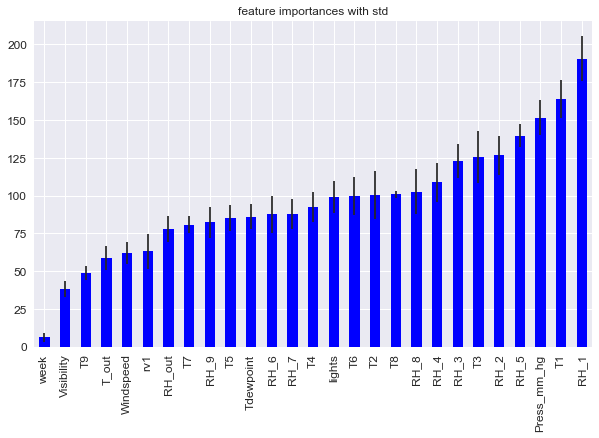

In [21]:
dat = pd.concat(f_imp) 
dat.describe().T.sort_values(by = 'mean').plot(y = 'mean', legend=False, figsize = (10,6),
                        title = 'feature importances with std',kind="bar",rot=90,color="blue",fontsize=12,yerr='std');


### Leafs

- Сколько суммарно листьев у depth-wise tree глубины D? (обозначим ответ за L)

Ответ: на каждом новом слое количество узлов увеличивается в два раза, поэтому количество листьев в конце будет равно 2**D

In [22]:
#Для тренировочной и валидационной части мы сделаем предсказания. 
#Но не в виде прогноза целевой переменной, а в виде перевода в новое признаковое пространство. 

test_data = data[data['week'] <= 20][data['week'] >= 19]
train_data = data[data['week'] <= 18]

train_x, train_y = train_data.drop(['Appliances'], axis = 1), train_data['Appliances']
test_x, test_y = test_data.drop(['Appliances'], axis = 1), test_data['Appliances']

param = {'max_depth': 4, 'n_jobs': -1}
xgbt = xgb.DMatrix(train_x, train_y)
bst = xgb.train(dtrain=xgbt, params=param, num_boost_round=200)


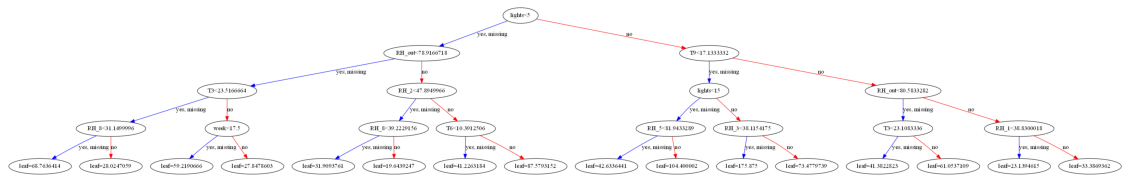

In [23]:
fig, ax = plt.subplots(figsize=(20, 100))
xgb.plot_tree(bst, ax = ax)
plt.show()

In [24]:
test_pred = bst.predict(xgb.DMatrix(test_x), pred_leaf=True)
train_pred = bst.predict(xgb.DMatrix(train_x), pred_leaf=True)

Здесь возникает проблема у меня. Дело в том что даже из визуализации дерева видно что у нас всего 16 листов, но если посмотреть индексы выдаваемые pred_leaf, то максимальный из них равен 30-ти, что странно если у нас всего 16 листов. Минимальный индекс листа при этом равен 2м. Если поставить max_depth = 3, то индексы переходят в интервал [1,14]. Я пытался разобраться с этой несостыковкой, но ничего не накопал, поэтому дальше продолжу с max_depth = 4, и буду считать что в дереве не 16, а 32 листа.

In [25]:
max(list(map(lambda x: max(x), train_pred))), min(list(map(lambda x: min(x), train_pred)))

(30.0, 2.0)

In [26]:
#Перевести индексы листьев из пространства [0...L) (индексы уникальны в рамках дерева) 
#в формат [0...N*L) (индексы уникальны в рамках всего ансамбля). 

test_pred_new = list(map(lambda x: x + np.arange(0, len(x))*(2**5), test_pred))
train_pred_new = list(map(lambda x: x + np.arange(0, len(x))*(2**5), train_pred))


In [27]:
#Вывести первые 10 строк и 10 стобцов старой и новой матрицы индексов
#+ размерности старой и новой матрицы индексов
#+ комментарием в ячейке полученные L и N*L

#Мы просто изменили индексы с локальных по дереву на глобальные по ансамблю,
#но никаких новых записей не делали, поэтому размерности не изменятся
np.array(test_pred_new).shape, test_pred.shape

((2016, 200), (2016, 200))

In [28]:
print(f'local idx: {test_pred[0][:10]}')
print(f'global idx: {test_pred_new[0][:10]}')

local idx: [18. 16. 16. 29. 20. 21. 26. 27. 17. 19.]
global idx: [ 18.  48.  80. 125. 148. 181. 218. 251. 273. 307.]


### One-Hot Encoding

In [29]:
test_pred_onehot = np.zeros((2016, 200*(2**5)))
train_pred_onehot = np.zeros((16128, 200*(2**5))) 

In [30]:
for i in range(2016):
    test_pred_onehot[i][test_pred_new[i].astype(int)] = 1

for i in range(16128):
    train_pred_onehot[i][train_pred_new[i].astype(int)] = 1    

In [31]:
print(f'one-hot: {np.where(test_pred_onehot[0] == 1)[0][:10]}')
print(f'global idx: {test_pred_new[0][:10]}')

#Проверим правильно ли перенеслись индексы при one-hot кодировании, для этого выведем индексы всех единичек
#и сравним с глобальными индексами листьев по ансамблю

one-hot: [ 18  48  80 125 148 181 218 251 273 307]
global idx: [ 18.  48.  80. 125. 148. 181. 218. 251. 273. 307.]


## D. Linear Regression

In [32]:
#поверх полученной матрицы из нулей и единиц обучаем линейную регрессию
#добавить L1 регуляризацию, λ=0.666

from sklearn.linear_model import Lasso

reg = Lasso(alpha = 0.666).fit(train_pred_onehot, train_y)

In [33]:
#какой % признаков отключился?

# Коэффициенты
print("Сдвиг={}".format(reg.intercept_))
print("Массив коэффициентов={}".format(reg.coef_))
print("% отключенных признаков={}%".format(len(np.where(reg.coef_ == 0)[0])/len(reg.coef_)*100))

Сдвиг=158.2680816408435
Массив коэффициентов=[0. 0. 0. ... 0. 0. 0.]
% отключенных признаков=97.59375%


##### В чём разница между L1 и L2 регуляризацией? почему L1 можно использовать для отбора признаков, а L2 нельзя?

Ответ: L1 отличается от L2 тем, что она обнуляет некоторые коэффициенты, а L2 пытается всё уменьшать равномерно.
Это связано с тем что L1-регуляризация выглядит так:
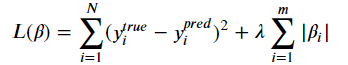
А L2 так:
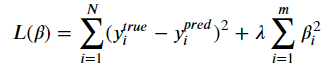

Т.е. L2 сделает коэффициент очень маленьким, но не занулит его, а при отборе признаков это неудобно, т.к неочевидно какие из признаков стоит отбросить, а какие все же вносят свой вклад. L1 в этом плане гораздо удобнее, она сразу зануляет все 'слабые' признаки.

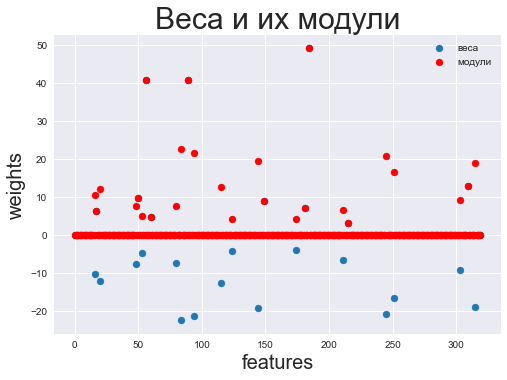

In [34]:
#визуализируйте scatter plot весов регрессии для первых 10 деревьев
#(сами веса + их модули) – должно получиться 10 * L точек

plt.xlabel('features', size = 20)
plt.ylabel('weights', size = 20)
plt.title('Веса и их модули', size = 30)

plt.scatter(x = range(320), y = reg.coef_[:320], label = 'веса')
plt.scatter(x = range(320), y = np.abs(reg.coef_[:320]), color='red', label = 'модули')
plt.legend();

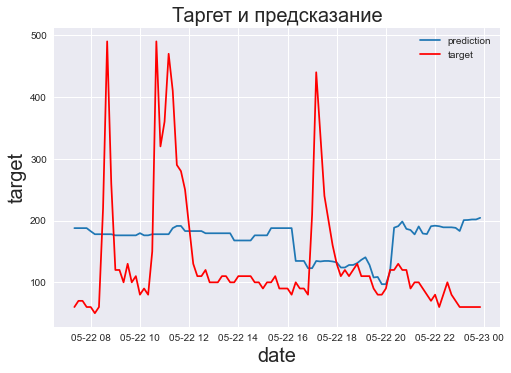

In [35]:
#Визуализировать реальный таргет и его прогноз (последние 100 точек, сортировка по дате).

preds = reg.predict(test_pred_onehot[-100:])

plt.xlabel('date', size = 20)
plt.ylabel('target', size = 20)
plt.title('Таргет и предсказание', size = 20)

plt.plot(test_y.index[-100:], preds, label = 'prediction')
plt.plot(test_y.index[-100:], test_y.values[-100:], color='red', label = 'target')
plt.legend();

#### Confidence Bound

- На веса модели (исключая bias) накинуть случайный шум 10000 раз.
- с помощью каждого инстанса зашумлённой модели делаем предикт

- Какие квантили отвечают за нижнюю и верхнюю границу 95%-го доверительного интервала? (LCB и UCB)

Квантиль перцентиля 2.5% и 97.5%, потому что а = 0.05, и а/2 = 0.025

In [36]:
bias = reg.intercept_
w = reg.coef_

In [37]:
from tqdm import tqdm

pred = []
for i in tqdm(range(10000)):
    r = np.random.normal(1, 0.2, 6400)
    w_i = w*r
    preds = w_i @ test_pred_onehot.T + bias
    pred.append(preds)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:59<00:00, 169.26it/s]


In [38]:
pr = np.array(pred).T

In [39]:
#взять данные LCB и UCB оценку по каждому объекту (таймстемпу) валидационной выборки
lcb_usb = list(map(lambda x: np.percentile(x, [2.5,97.5]), pr))

In [40]:
lcb_usb[:5]

[array([ 97.55045981, 122.8208151 ]),
 array([ 97.55045981, 122.8208151 ]),
 array([ 86.61005895, 111.21996142]),
 array([ 86.61005895, 111.21996142]),
 array([ 86.61005895, 111.21996142])]

In [41]:
#посчитать % случаев , когда реальное значение попадает в область доверительного интервала

count = 0
for i in range(len(test_y)):
    if test_y[i]<=lcb_usb[i][1] and test_y[i]>=lcb_usb[i][0]:
        count+=1

print(f'{round(count/len(test_y)*100,4)} %')


9.871 %


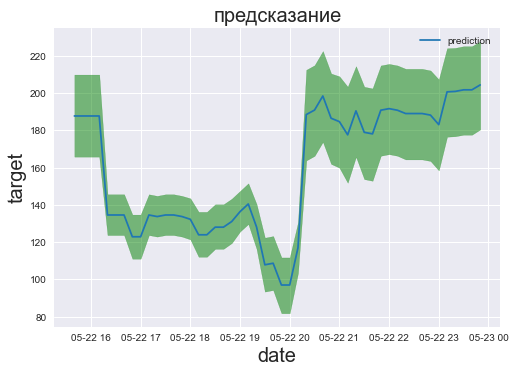

In [42]:
#визуализировать (таргет + прогноз + прозрачным цветом область доверительного интервала). 

preds = reg.predict(test_pred_onehot[-50:])

plt.xlabel('date', size = 20)
plt.ylabel('target', size = 20)
plt.title('предсказание', size = 20)

plt.plot(test_y.index[-50:], preds, label = 'prediction')
plt.fill_between(test_y.index[-50:], np.array(lcb_usb).T[0][-50:], np.array(lcb_usb).T[1][-50:],
                     color = 'green', alpha=.5)
plt.legend();

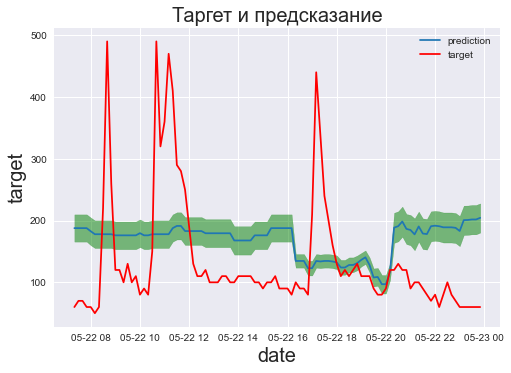

In [43]:
preds = reg.predict(test_pred_onehot[-100:])

plt.xlabel('date', size = 20)
plt.ylabel('target', size = 20)
plt.title('Таргет и предсказание', size = 20)

plt.plot(test_y.index[-100:], preds, label = 'prediction')
plt.plot(test_y.index[-100:], test_y.values[-100:], color='red', label = 'target')
plt.fill_between(test_y.index[-100:], np.array(lcb_usb).T[0][-100:], np.array(lcb_usb).T[1][-100:],
                     color = 'green', alpha=.5)
plt.legend();

## Quantile Regression

In [44]:
from sklearn.linear_model import QuantileRegressor

In [45]:
test_y.shape

(2016,)

In [78]:
#Установить dev-пакет sklearn, обучить QuantileRegressor на 1) медиану

#при полном обучающем датасете компьютер не вывозит и выдает ошибку памяти, поэтому пришлось сильно обрезать датасет
q_reg = QuantileRegressor(alpha = 0)
q_reg.fit(train_pred_onehot[-2000:], train_y.values[-2000:])

QuantileRegressor(alpha=0)

In [79]:
pred_median = q_reg.predict(test_pred_onehot)

In [80]:
q_reg = QuantileRegressor(quantile = 0.025, alpha = 0)
q_reg.fit(train_pred_onehot[-2000:], train_y.values[-2000:])

QuantileRegressor(alpha=0, quantile=0.025)

In [81]:
pred_lcb = q_reg.predict(test_pred_onehot)

In [82]:
q_reg = QuantileRegressor(quantile = 0.975, alpha = 0)
q_reg.fit(train_pred_onehot[-2000:], train_y.values[-2000:])

QuantileRegressor(alpha=0, quantile=0.975)

In [83]:
pred_ucb = q_reg.predict(test_pred_onehot)

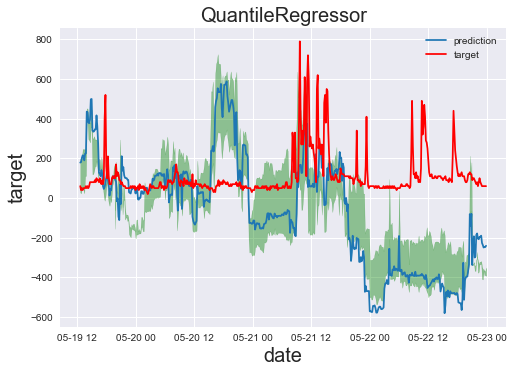

In [87]:
# Визуализировать все 3 регрессии аналогично предыдущему заданию

plt.xlabel('date', size = 20)
plt.ylabel('target', size = 20)
plt.title('QuantileRegressor', size = 20)

plt.plot(test_y.index[-500:], pred_median[-500:], label = 'prediction')
plt.plot(test_y.index[-500:], test_y.values[-500:], color='red', label = 'target')
plt.fill_between(test_y.index[-500:], pred_lcb[-500:], pred_ucb[-500:],
                     color = 'green', alpha=.4)
plt.legend();

In [85]:
#посчитать % случаев , когда реальное значение попадает в область доверительного интервала

count = 0
for i in range(len(test_y)):
    if test_y[i]<=pred_ucb[i] and test_y[i]>=pred_lcb[i]:
        count+=1

print(f'{round(count/len(test_y)*100,4)} %')


14.8313 %
